<a href="https://colab.research.google.com/github/HariTarz/Mobile_Price_Range_Prediction/blob/main/PS_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## <b> Data Description </b>

### Data fields
* #### Battery_power - Total energy a battery can store in one time measured in mAh.
* #### Blue - Has bluetooth or not.
* #### Clock_speed - speed at which microprocessor executes instructions.
* #### Dual_sim - Has dual sim support or not.
* #### Fc - Front Camera mega pixels.
* #### Four_g - Has 4G or not.
* #### Int_memory - Internal Memory in Gigabytes.
* #### M_dep - Mobile Depth in cm.
* #### Mobile_wt - Weight of mobile phone.
* #### N_cores - Number of cores of processor.
* #### Pc - Primary Camera mega pixels.
* #### Px_height - Pixel Resolution Height.
* #### Px_width - Pixel Resolution Width.
* #### Ram - Random Access Memory in Mega Bytes.
* #### Sc_h - Screen Height of mobile in cm.
* #### Sc_w - Screen Width of mobile in cm.
* #### Talk_time - longest time that a single battery charge will last when you are.
* #### Three_g - Has 3G or not.
* #### Touch_screen - Has touch screen or not.
* #### Wifi - Has wifi or not.
* #### Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).



## Import libraries

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mounting the drive and reading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Creating a the dataset file that and reading the dataset
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Classification Capstone Project/PS - Mobile Price Range Prediction/dat/data_mobile_price_range.csv'
data = pd.read_csv(path)

## Exploring the dataset

In [4]:
# Viewing the dataset for first time
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Viewing the size of the dataset
data.shape

(2000, 21)

In [7]:
# Checking for null values in the dataset
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# Checking for categoriacal values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

## Exploratory Data Analysis

### Categotical Features

Text(0.5, 1.0, 'price_range counts')

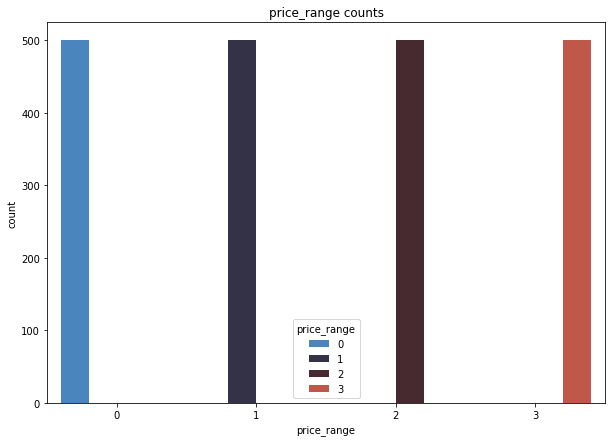

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='price_range', data=data, hue='price_range', palette= 'icefire')
sns.set_theme(style='whitegrid')
ax.set_xlabel('price_range')
# ax.set_ylabel('Frequency')
ax.set_title('price_range counts')

In [11]:
categorical_columns= [ 'blue',  'dual_sim',  'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

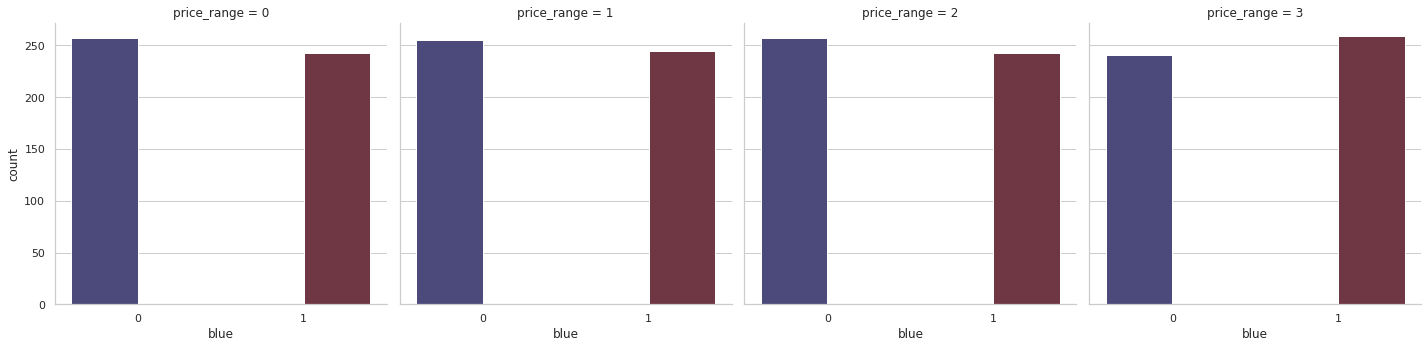

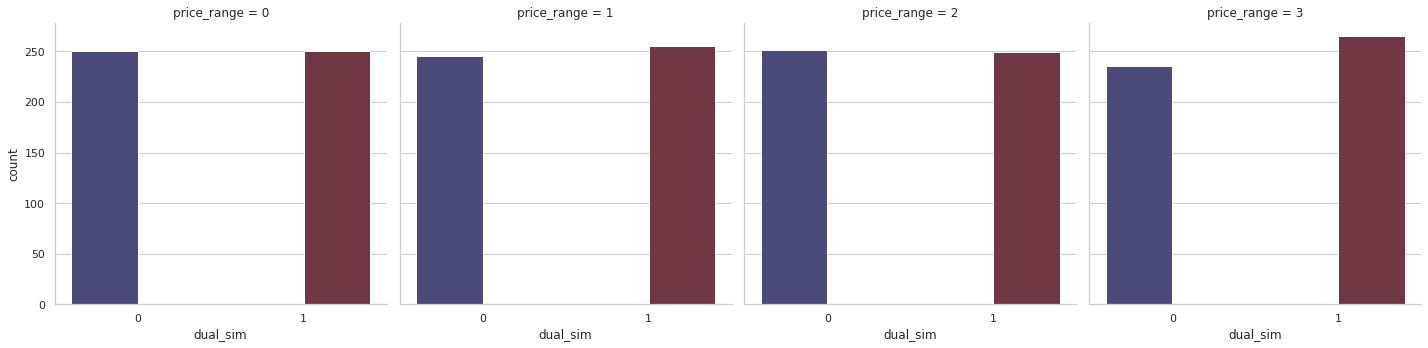

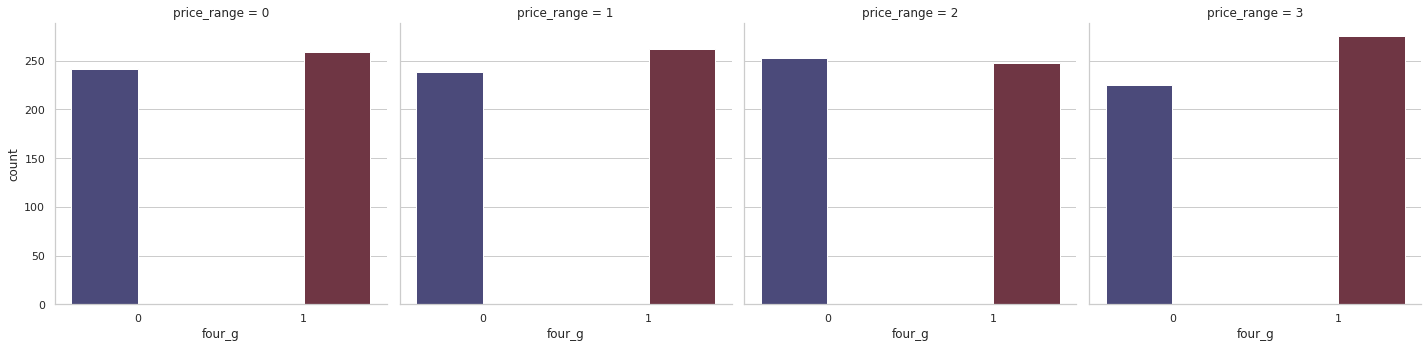

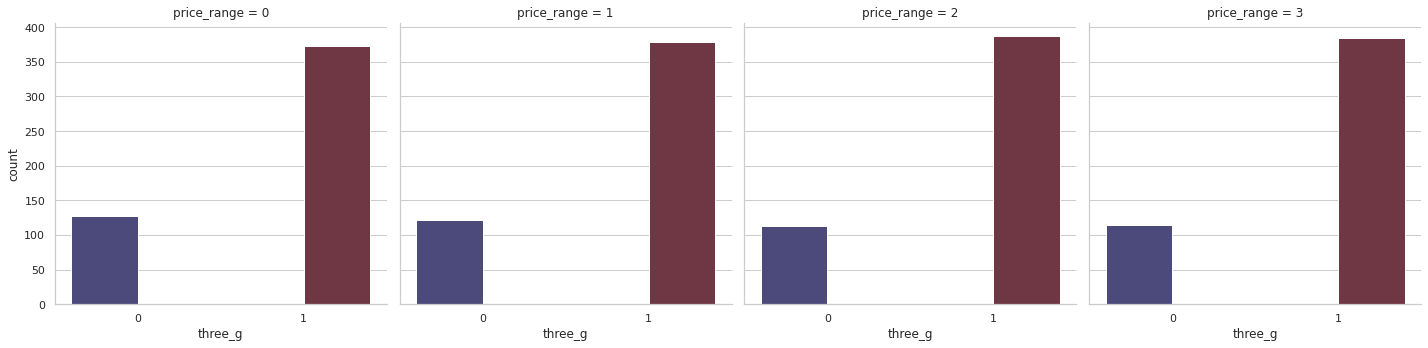

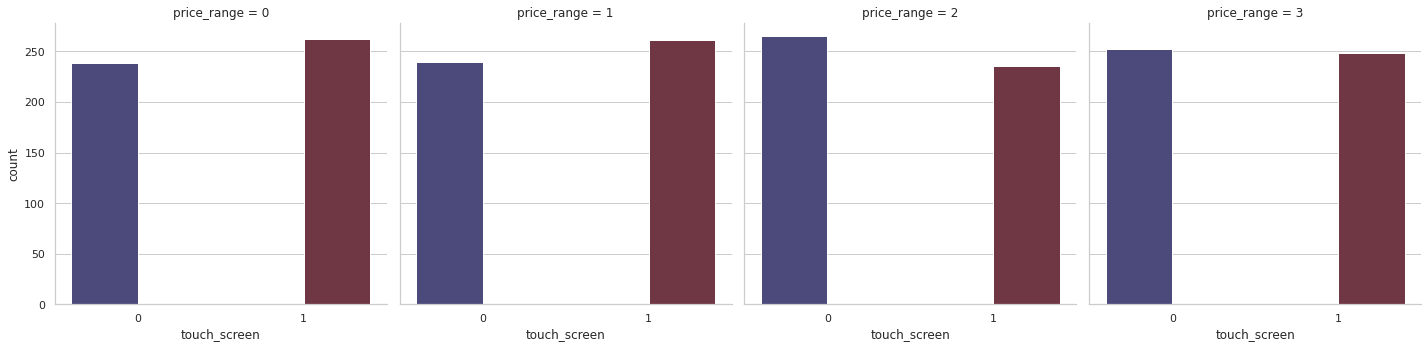

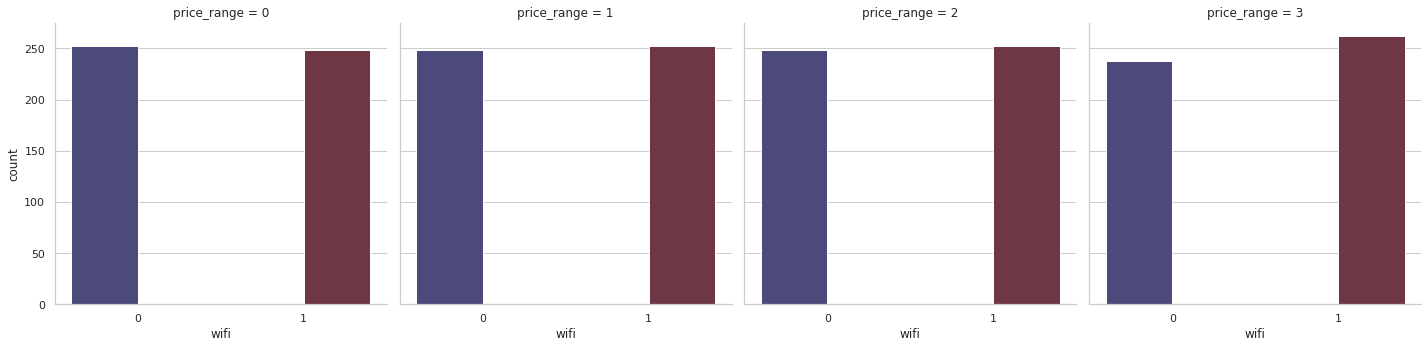

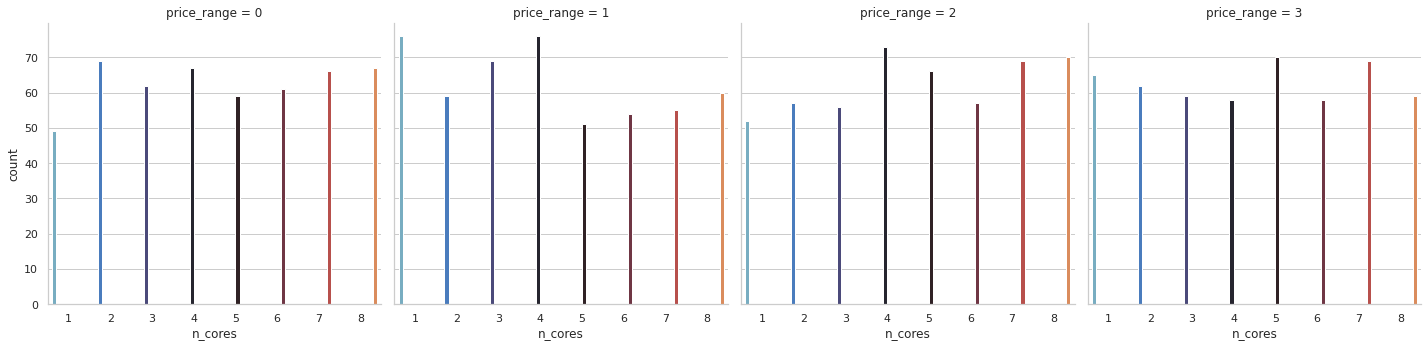

In [12]:
for col in categorical_columns:
  sns.catplot(x=col, hue=col, col="price_range", data=data, kind="count", height=5, aspect=1, palette= 'icefire');
  sns.set_theme(style='whitegrid')

### Continous Features

Text(0.5, 1.0, 'Battery power VS price range')

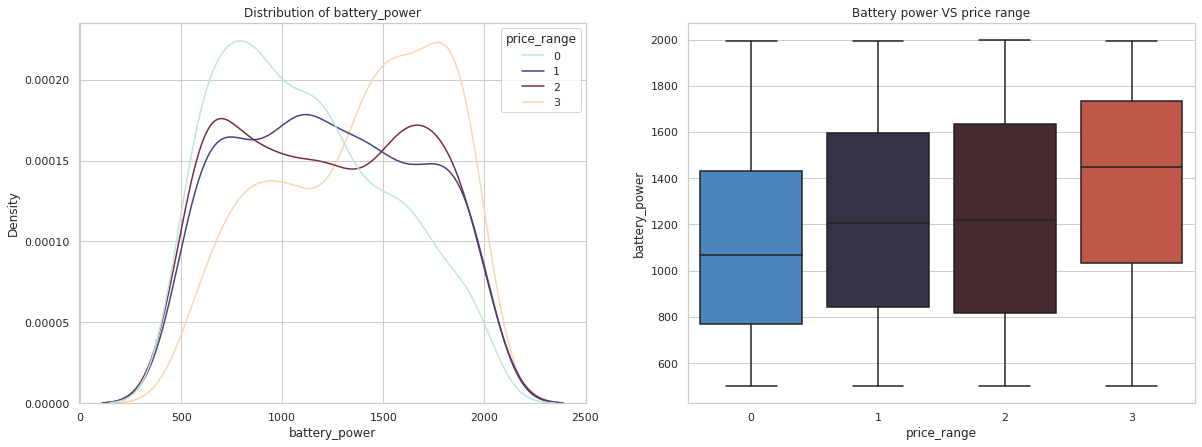

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="battery_power", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of battery_power')
sns.boxplot(y="battery_power", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Battery power VS price range')

Text(0.5, 1.0, 'clock_speed VS price range')

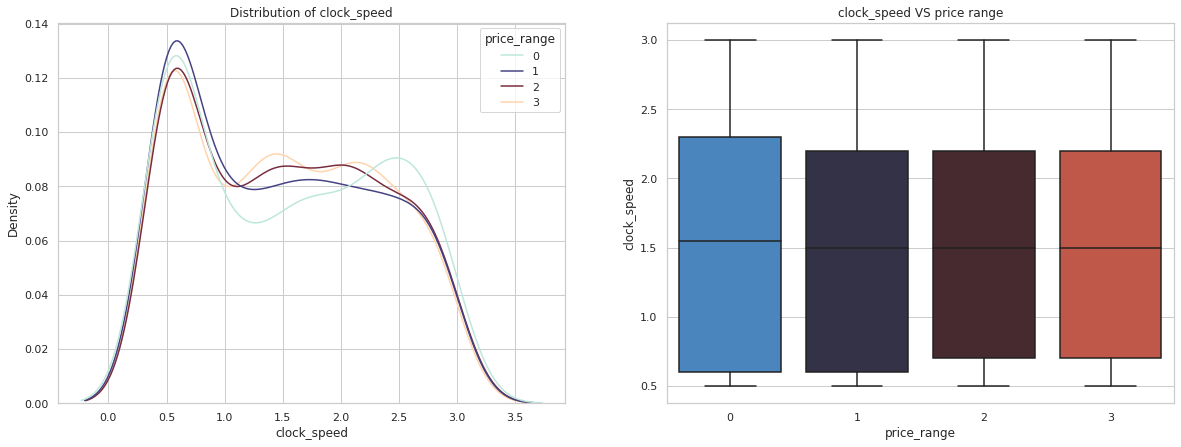

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="clock_speed", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of clock_speed')
sns.boxplot(y="clock_speed", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('clock_speed VS price range')

Text(0.5, 1.0, 'Front camera resolution (fc) VS price range')

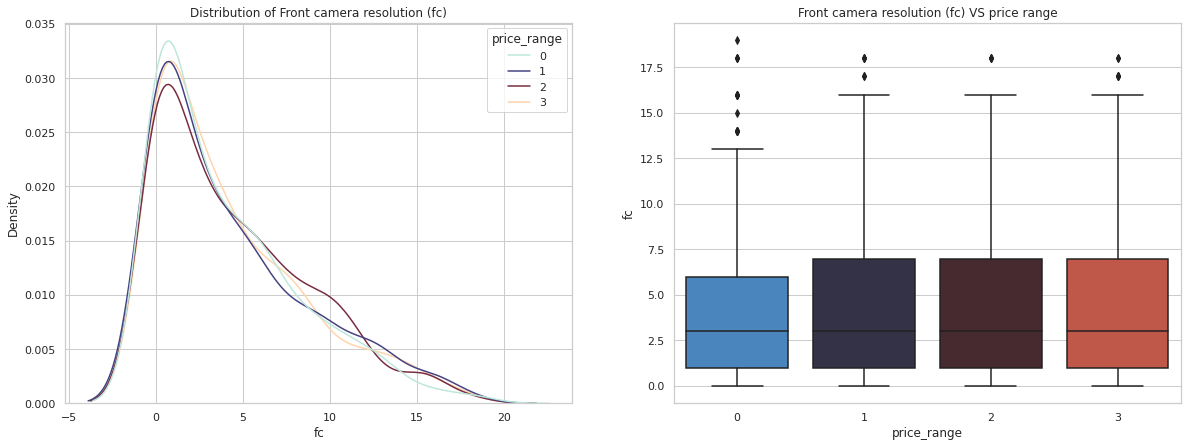

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="fc", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of Front camera resolution (fc)')
sns.boxplot(y="fc", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Front camera resolution (fc) VS price range')

Text(0.5, 1.0, 'Primary camera resolution (fc) VS price range')

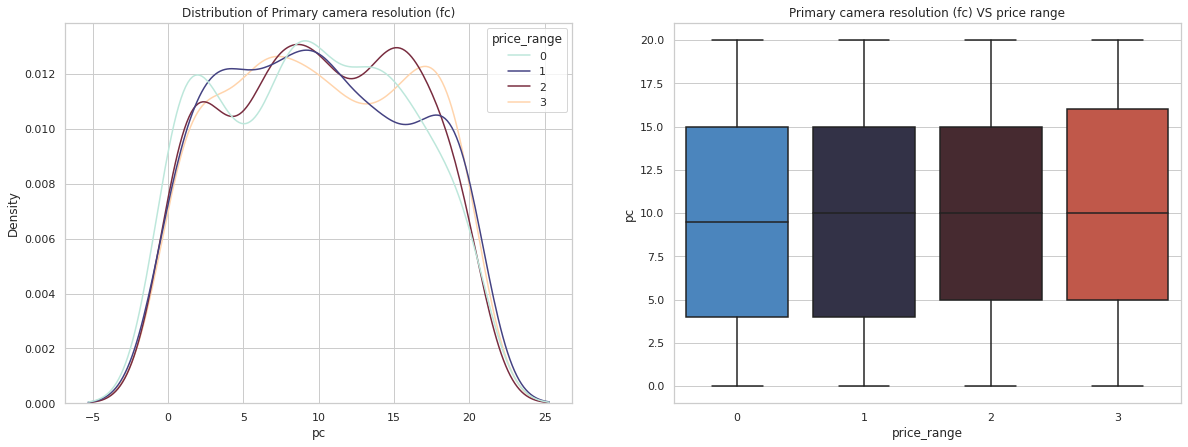

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="pc", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of Primary camera resolution (fc)')
sns.boxplot(y="pc", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Primary camera resolution (fc) VS price range')

Text(0.5, 0, 'Front Camera(Red) - Rear Camera(Blue')

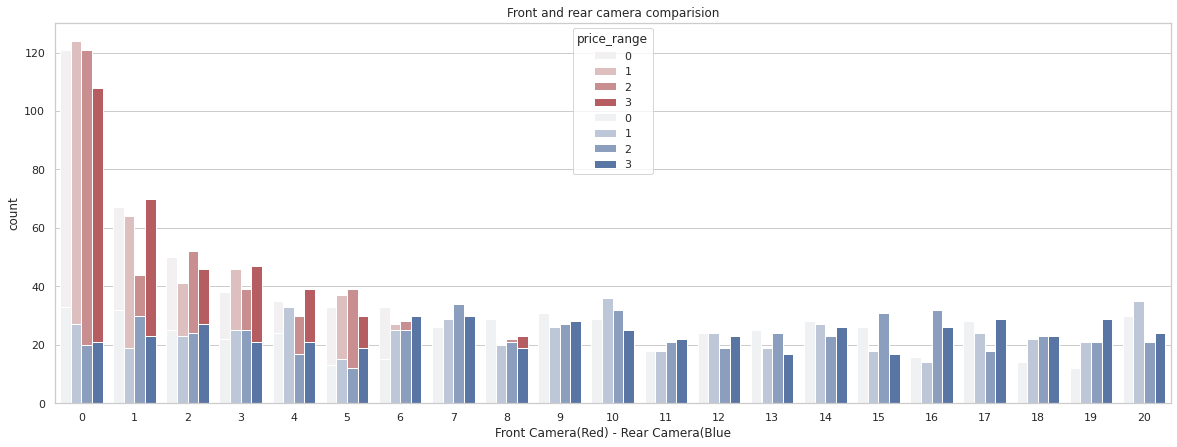

In [17]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(x='fc', data=data, hue='price_range' ,color= 'r', ax=ax)
sns.countplot(x='pc', data=data, hue='price_range', color= 'b', ax=ax)
ax.set_title('Front and rear camera comparision')
ax.set_xlabel('Front Camera(Red) - Rear Camera(Blue')

Text(0.5, 1.0, 'internalmemory VS price range')

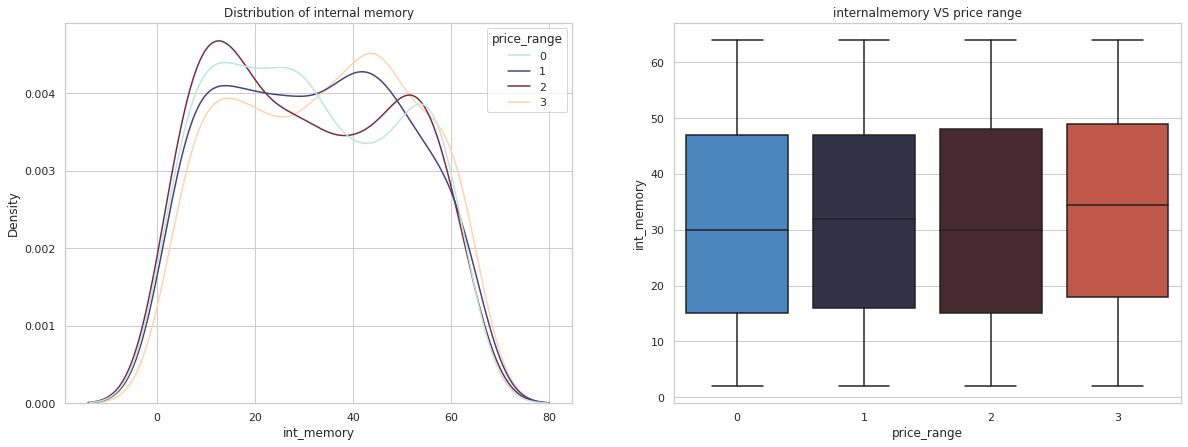

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="int_memory", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of internal memory')
sns.boxplot(y="int_memory", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('internalmemory VS price range')

Text(0.5, 1.0, 'mobile depth VS price range')

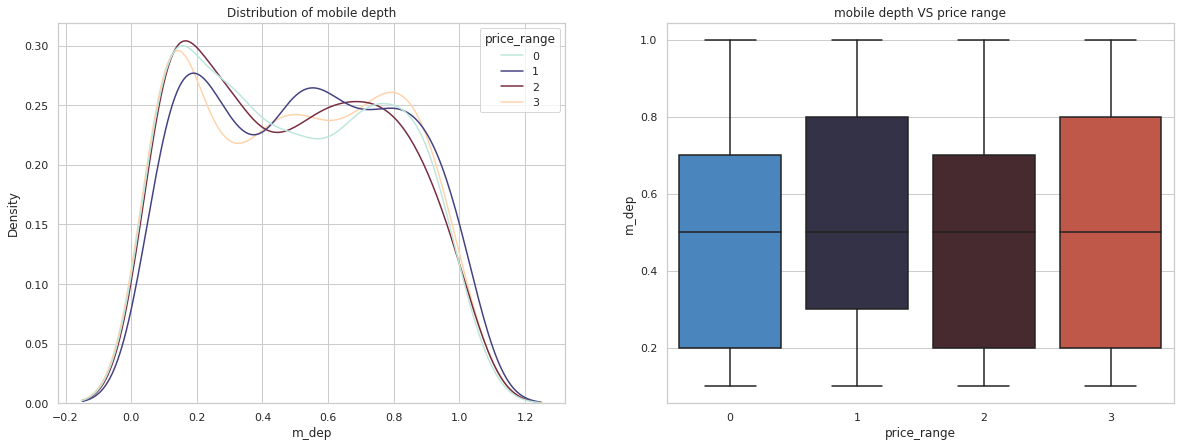

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="m_dep", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of mobile depth')
sns.boxplot(y="m_dep", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('mobile depth VS price range')

Text(0.5, 1.0, 'mobile width VS price range')

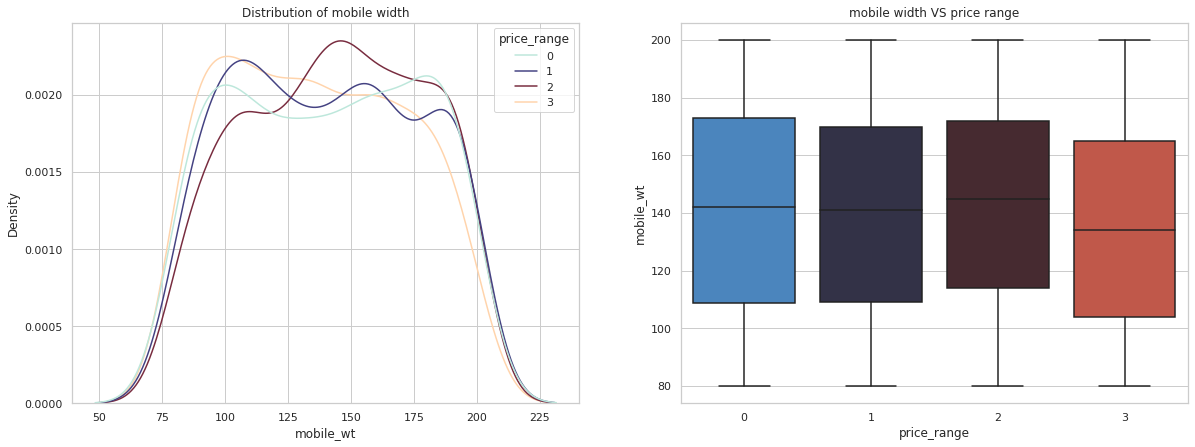

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="mobile_wt", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of mobile width')
sns.boxplot(y="mobile_wt", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('mobile width VS price range')

Text(0.5, 1.0, 'pixels height VS price range')

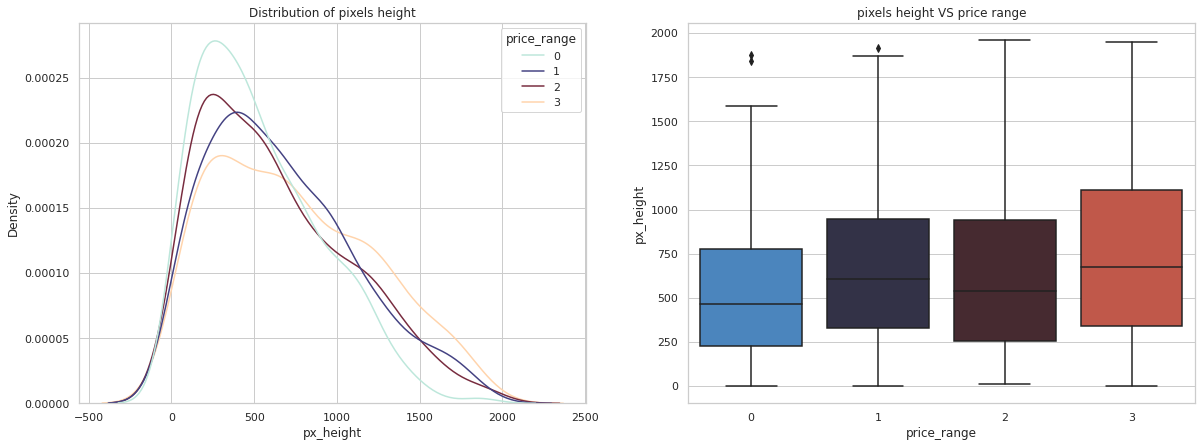

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="px_height", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of pixels height')
sns.boxplot(y="px_height", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('pixels height VS price range')

Text(0.5, 1.0, 'pixels width VS price range')

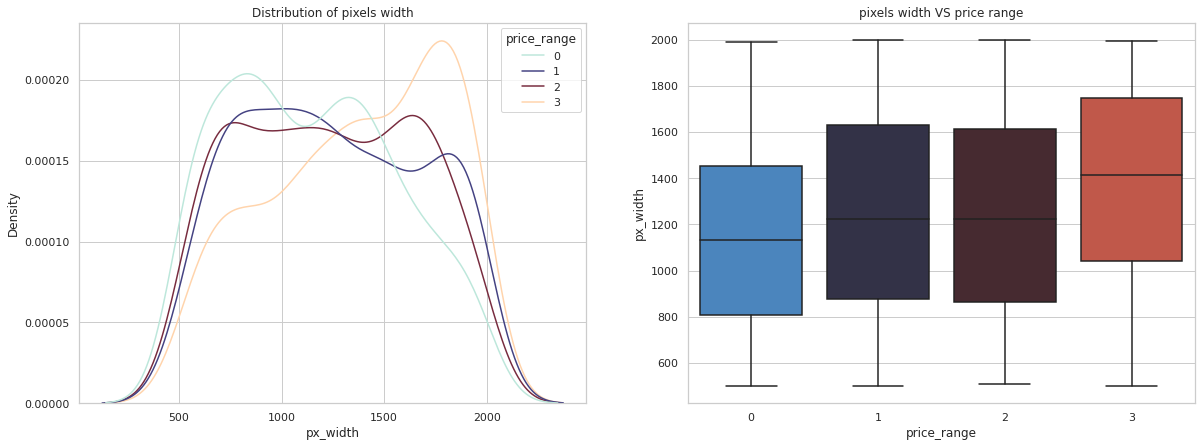

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="px_width", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of pixels width')
sns.boxplot(y="px_width", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('pixels width VS price range')

Text(0.5, 1.0, 'ram size(in GB) VS price range')

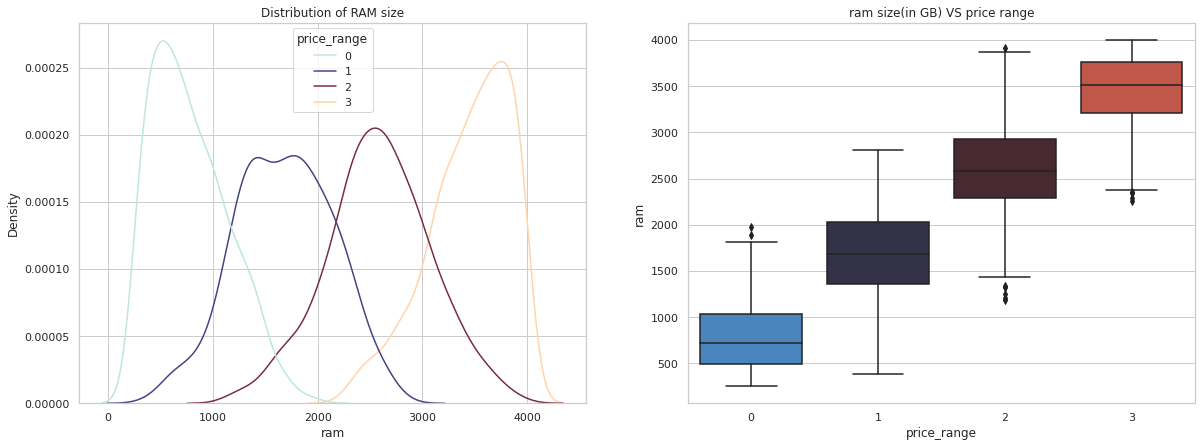

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="ram", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of RAM size')
sns.boxplot(y="ram", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('ram size(in GB) VS price range')

Text(0.5, 1.0, 'screen height(in CM) VS price range')

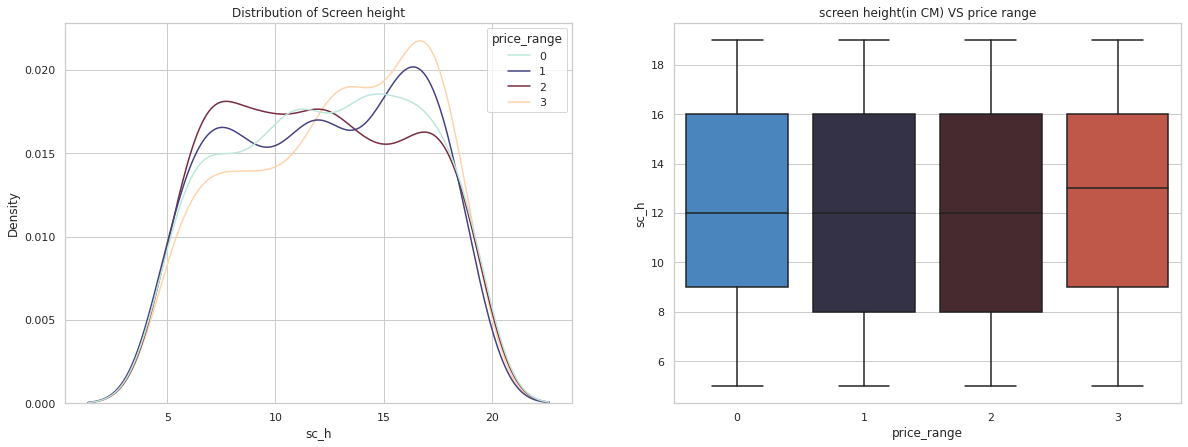

In [24]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="sc_h", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Screen height')
sns.boxplot(y="sc_h", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('screen height(in CM) VS price range')

Text(0.5, 1.0, 'screen width(in CM) VS price range')

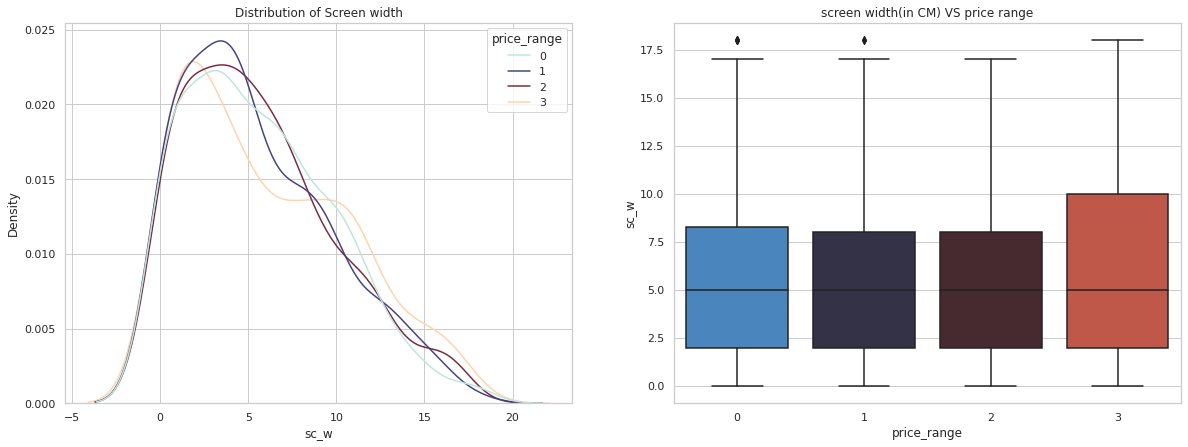

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="sc_w", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Screen width')
sns.boxplot(y="sc_w", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('screen width(in CM) VS price range')

Text(0.5, 1.0, 'talk_time(in hours) VS price range')

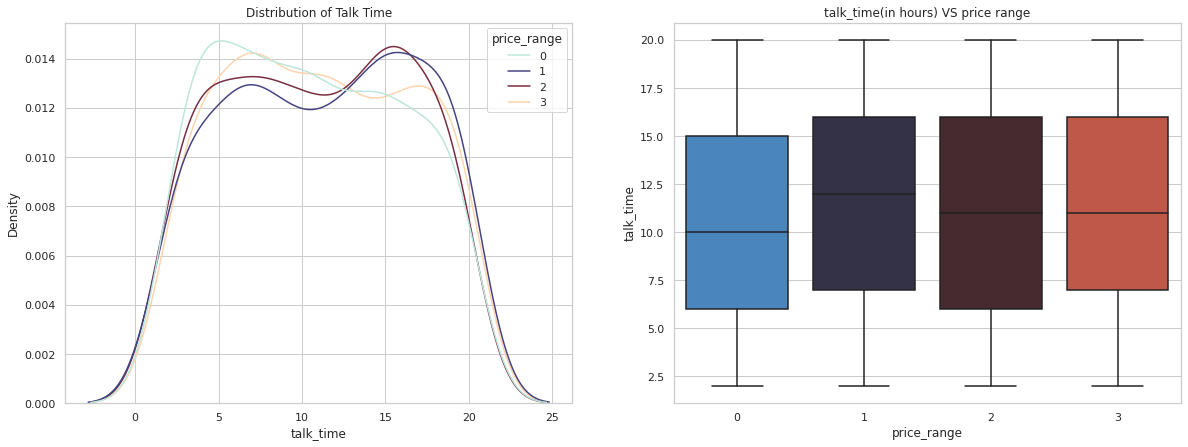

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="talk_time", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Talk Time')
sns.boxplot(y="talk_time", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('talk_time(in hours) VS price range')

## Feature Engineering

In [27]:
df = data.copy()

In [28]:
df[df.sc_w== 0].shape[0]

180

Text(0.5, 1.0, 'Non-zero Screen_Width and  Screen_height')

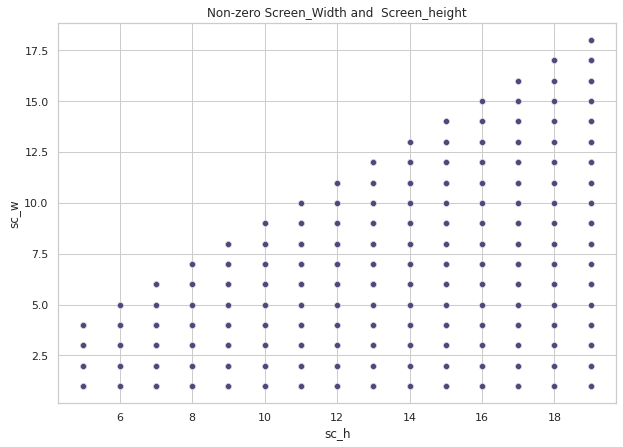

In [29]:
# Plotting between Non-zero Screen_Width and  Screen_height
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x= 'sc_h', y= 'sc_w', data= df[df.sc_w!= 0], color='#4b4a7a')
sns.set_theme(style='whitegrid')
# ax.set_xlabel('fc')
# ax.set_ylabel('Frequency')
ax.set_title('Non-zero Screen_Width and  Screen_height')

In [30]:
sc_w_mean = df[df['sc_w']!=0].groupby('sc_h')['sc_w'].mean()
sc_w_mean_dict = dict(sc_w_mean)
sc_w_mean_dict = {key : round(sc_w_mean_dict[key]) for key in sc_w_mean_dict}
sc_w_mean_dict

{5: 2,
 6: 3,
 7: 4,
 8: 4,
 9: 4,
 10: 5,
 11: 6,
 12: 7,
 13: 7,
 14: 7,
 15: 7,
 16: 8,
 17: 9,
 18: 9,
 19: 10}

In [31]:
def update_zero_width(w,h):
  if w == 0:
    return sc_w_mean_dict[h]
  else:
    return w

In [32]:
df['sc_w']= df.apply(lambda x: update_zero_width(x.sc_w, x.sc_h), axis=1)

In [33]:
df[df['sc_w']==0].shape[0]

0

In [34]:
# Find the diagonalscreensize
# Since the shape of the screen is square/rectangle, we can use Pythagoras theorm (W**2 + H**2)**0.5
df['screen_size'] = ((df.sc_w**2)+(df.sc_h**2))**0.5
df.drop(['sc_w', 'sc_h'], axis= 1, inplace = True)

In [35]:
df[df['px_height']== 0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  talk_time  \
1481    0.1         99        4  11          0      1987  3692         16   
1933    0.6        154        8  10          0       994  1958          7   

      three_g  touch_screen  wifi  price_range  screen_size  
1481        1             1     0            3    14.764823  
1933        1             1     0            1     8.602325

Text(0.5, 1.0, 'Non-zero Pixel_Width and  Pixel_height')

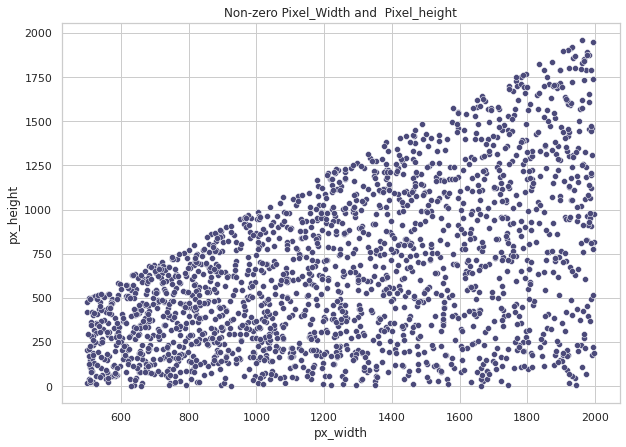

In [36]:
# Plotting between Non-zero pixel_Width and  Pixel_height
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x= 'px_width', y= 'px_height', data= df[df.px_height!= 0], color='#4b4a7a')
sns.set_theme(style='whitegrid')
# ax.set_xlabel('fc')
# ax.set_ylabel('Frequency')
ax.set_title('Non-zero Pixel_Width and  Pixel_height')

In [37]:
len(df.px_width.value_counts())

1109

In [38]:
px_height_mean = df[df['px_height']!=0].groupby('px_width')['px_height'].mean()
px_height_mean_dict = dict(px_height_mean)
px_height_mean_dict = {key : round(px_height_mean_dict[key]) for key in px_height_mean_dict}
px_height_mean_dict

{500: 448,
 501: 112,
 503: 295,
 506: 501,
 507: 138,
 508: 26,
 509: 360,
 510: 99,
 511: 230,
 512: 184,
 513: 232,
 515: 418,
 516: 124,
 517: 210,
 518: 174,
 519: 296,
 520: 368,
 521: 134,
 522: 390,
 525: 15,
 527: 238,
 528: 407,
 529: 119,
 530: 422,
 533: 357,
 534: 338,
 536: 436,
 537: 455,
 538: 306,
 539: 259,
 540: 168,
 541: 238,
 542: 477,
 544: 216,
 545: 260,
 547: 322,
 548: 509,
 549: 377,
 550: 292,
 551: 503,
 556: 419,
 557: 64,
 558: 228,
 559: 114,
 562: 34,
 563: 402,
 564: 238,
 565: 468,
 566: 63,
 568: 447,
 569: 440,
 570: 275,
 571: 472,
 572: 410,
 574: 484,
 575: 59,
 577: 113,
 580: 222,
 581: 62,
 582: 201,
 583: 171,
 584: 173,
 585: 235,
 588: 175,
 589: 361,
 590: 418,
 591: 308,
 592: 518,
 593: 287,
 594: 334,
 596: 579,
 598: 116,
 599: 401,
 603: 296,
 605: 271,
 607: 368,
 610: 227,
 613: 272,
 614: 466,
 615: 79,
 616: 370,
 618: 536,
 619: 162,
 620: 166,
 621: 532,
 622: 140,
 623: 245,
 627: 333,
 629: 274,
 630: 159,
 631: 400,
 632: 62

In [39]:
df['px_height']= df.apply(lambda x: (px_height_mean_dict[x.px_width] if x.px_height == 0 else x.px_height), axis=1)

In [40]:
df[df['px_height']==0].shape[0]

0

In [41]:
df['pixels_resolution'] = df['px_height']*df['px_width']
df.drop(['px_height', 'px_width'], axis= 1, inplace = True)

## Handling Categorical Features

In [42]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_size',
       'pixels_resolution'],
      dtype='object')

In [43]:
cat_col= [ 'blue',  'dual_sim',  'four_g', 'three_g', 'n_cores', 'touch_screen', 'wifi']
continous_col = ['battery_power', 'clock_speed','fc', 'pc' ,'int_memory','m_dep', 'mobile_wt', 'ram', 'talk_time','screen_size', 'pixels_resolution']
target_col= ['price_range']

In [44]:
# checking for the mobile which supports 4G but not supports 3G
df[(df.three_g == 0) & (df.four_g == 1)]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, ram, talk_time, three_g, touch_screen, wifi, price_range, screen_size, pixels_resolution]
Index: []

In [45]:
df['network_support'] = df['four_g'] + df['three_g']
df.drop(['four_g', 'three_g'], axis= 1, inplace= True)

Since we don't have any such mobile records in our dataset we combinined the both the columns to form a new valid column named 'network_support'.




* 2 - Supports both 3G and 4G
* 1 - Supports only 3G
* 0 - Not Supports the both 3G and 4G

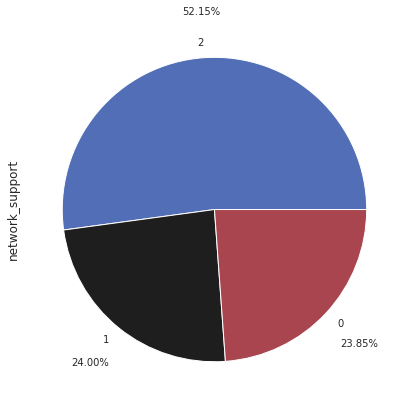

In [46]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
colors= ['#526eb6', '#1f1e1e', '#a8454e']
df.network_support.value_counts().plot(kind='pie', fontsize=10, autopct='%1.2f%%',pctdistance=1.3, labeldistance=1.1, colors=colors)

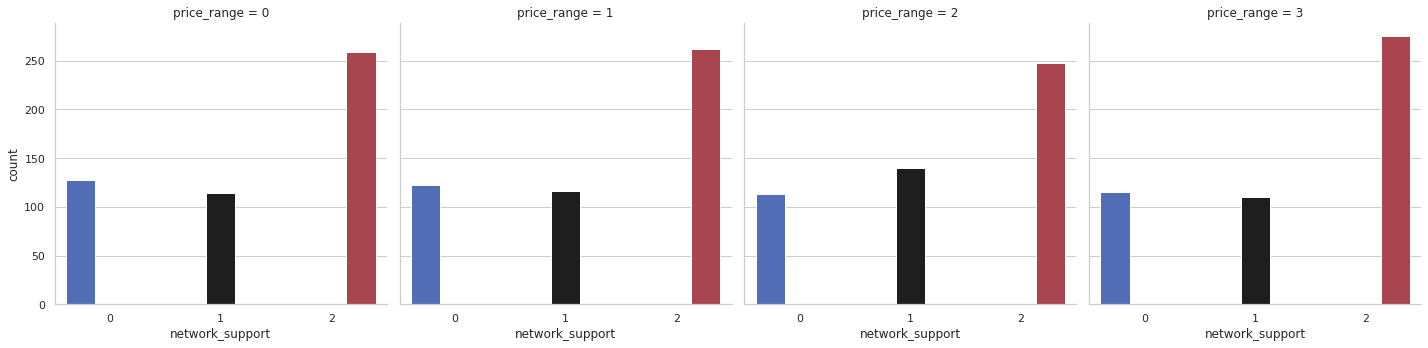

In [47]:
sns.catplot(data=df, x="network_support", col="price_range", hue="network_support", kind="count", palette= 'icefire')

In [48]:
(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'screen_size',
       'pixels_resolution', 'network_support'],
      dtype='object')

In [49]:
continous_col = ['battery_power', 'clock_speed','fc', 'pc' ,'int_memory','m_dep', 'mobile_wt', 'ram', 'talk_time','screen_size', 'pixels_resolution']
cat_col= [ 'blue',  'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'network_support']
target_col= ['price_range']
continous_col + cat_col + target_col

['battery_power',
 'clock_speed',
 'fc',
 'pc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'ram',
 'talk_time',
 'screen_size',
 'pixels_resolution',
 'blue',
 'dual_sim',
 'n_cores',
 'touch_screen',
 'wifi',
 'network_support',
 'price_range']

## Correlation analysis

Text(0.5, 1.0, 'Mobile price range prediction dataset correlation')

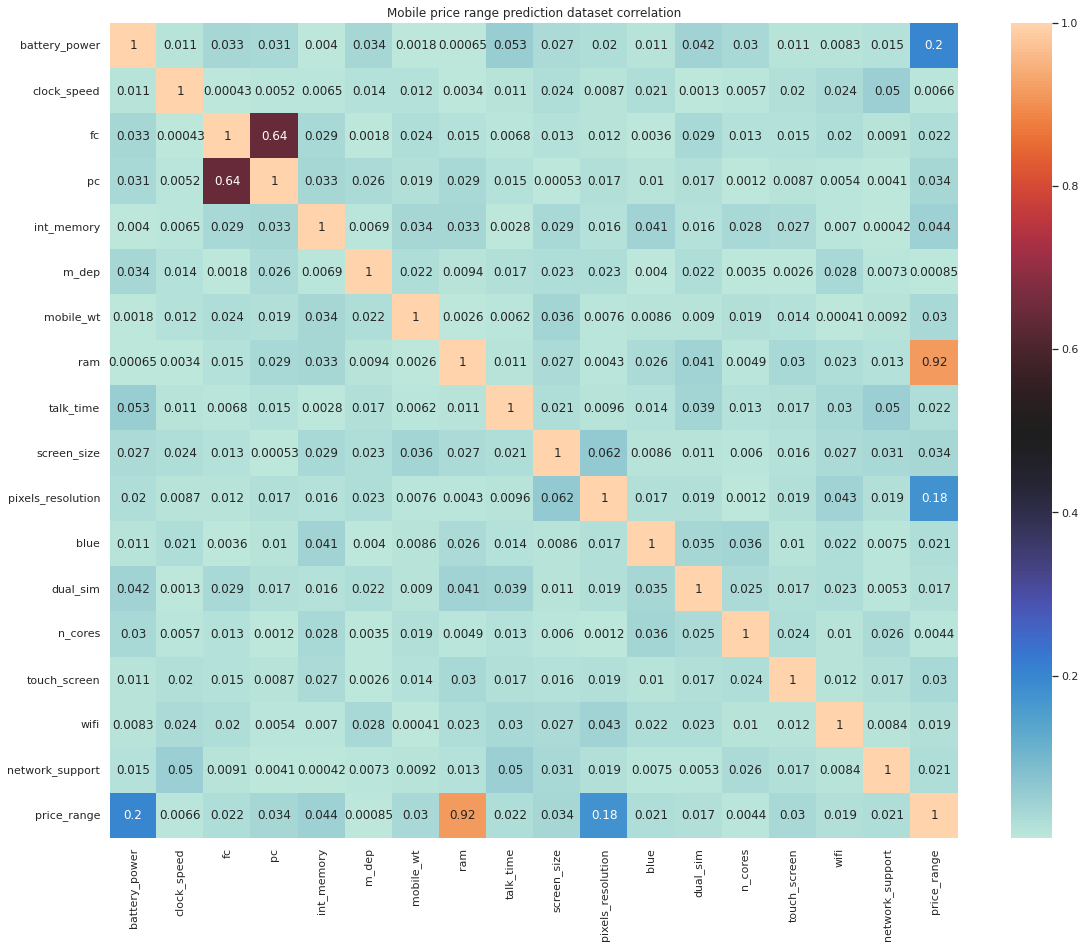

In [50]:
df_corr = df[continous_col + cat_col + target_col].corr()

# Plotting the correlation
fig = plt.figure(figsize=(19,15))
ax = fig.gca()
sns.heatmap(abs(df_corr), annot=True, cmap='icefire')
plt.title('Mobile price range prediction dataset correlation')

## Splitting the data for training and testing

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, log_loss, roc_auc_score

In [52]:
X=df[continous_col + cat_col].copy()
y=df[target_col].copy().values.ravel()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 6)

In [54]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

print("Distribution of classes of dependent variable in train :")
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print("\n Distribution of classes of dependent variable in test :")
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

The shape of train dataset :
(1200, 17)

 The shape of test dataset :
(800, 17)
Distribution of classes of dependent variable in train :
[[  0 318]
 [  1 290]
 [  2 298]
 [  3 294]]

 Distribution of classes of dependent variable in test :
[[  0 182]
 [  1 210]
 [  2 202]
 [  3 206]]


## Random Forest Classification

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=30)

In [235]:
rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=6)

In [236]:
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

1.0
0.8


In [237]:
y_train_pred_rf_clf = rf_clf.predict(X_train)
y_train_pred_rf_clf[:10]

array([1, 0, 1, 0, 3, 1, 0, 2, 3, 1])

In [238]:
y_train[:10]

array([1, 0, 1, 0, 3, 1, 0, 2, 3, 1])

In [239]:
confusion_matrix_train_rf_clf= confusion_matrix(y_train, y_train_pred_rf_clf)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_rf_clf)

clf_report_train_rf_clf= classification_report(y_train, y_train_pred_rf_clf)
print("\nClassification report for train data:\n", clf_report_train_rf_clf)


Confusion Matrix for train data:
 [[499   0   0   0]
 [  0 496   0   0]
 [  0   0 499   0]
 [  0   0   0 496]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00       499
           3       1.00      1.00      1.00       496

    accuracy                           1.00      1990
   macro avg       1.00      1.00      1.00      1990
weighted avg       1.00      1.00      1.00      1990



In [240]:
y_test_pred_rf_clf = rf_clf.predict(X_test)
y_test_pred_rf_clf[:10]

array([3, 0, 1, 1, 1, 1, 3, 3, 2, 1])

In [241]:
y_test[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1])

In [242]:
confusion_matrix_test_rf_clf= confusion_matrix(y_test, y_test_pred_rf_clf)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_rf_clf)

clf_report_test_rf_clf= classification_report(y_test, y_test_pred_rf_clf)
print("\nClassification report for test data:\n", clf_report_test_rf_clf)


Confusion Matrix for test data:
 [[1 0 0 0]
 [0 4 0 0]
 [0 1 0 0]
 [0 0 1 3]]

Classification report for test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4

    accuracy                           0.80        10
   macro avg       0.70      0.69      0.69        10
weighted avg       0.82      0.80      0.80        10



## Random Forest Classification using GridSearchCV

In [243]:
rf = RandomForestClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [244]:
bootstrap = [True, False]
max_depth = [80, 90, 100]
max_features = [8, 9, 10, 12, 'auto']
min_samples_leaf = [2, 3]
min_samples_split = [2, 3, 8]
n_estimators = [10, 30, 50]

rf_grid_Param_dict = {'bootstrap': bootstrap,
              'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'n_estimators' : n_estimators}

pprint(rf_grid_Param_dict)

{'bootstrap': [True, False],
 'max_depth': [80, 90, 100],
 'max_features': [8, 9, 10, 12, 'auto'],
 'min_samples_leaf': [2, 3],
 'min_samples_split': [2, 3, 8],
 'n_estimators': [10, 30, 50]}


In [245]:
X_part, X_new, y_part, y_new = train_test_split(X, y, test_size=0.01, random_state=30)

In [246]:
# First create the base model to tune
rf = RandomForestClassifier()

# Grid Search of parameters, using 3 fold cross validation,
rf_grid = GridSearchCV(estimator = rf, param_grid = rf_grid_Param_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
rf_grid.fit(X_part, y_part)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 90, 100],
                         'max_features': [8, 9, 10, 12, 'auto'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 8],
                         'n_estimators': [10, 30, 50]},
             verbose=2)

In [247]:
# Viewing the best paramters for the optimal model
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 30}

In [248]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=100, max_features=10, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=30)

In [249]:
# Testing the optimal model with training data
rf_optimal_model =rf_grid.best_estimator_
y_train_pred_rf_gridCV = rf_optimal_model.predict(X_part)
y_train_pred_rf_gridCV[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0])

In [250]:
y_part[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0])

In [251]:
confusion_matrix_train_rf_gridCV= confusion_matrix(y_part, y_train_pred_rf_gridCV)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_rf_gridCV)

clf_report_train_rf_gridCV= classification_report(y_part, y_train_pred_rf_gridCV)
print("\nClassification report for train data:\n", clf_report_train_rf_gridCV)


Confusion Matrix for train data:
 [[491   5   0   0]
 [  0 491   1   0]
 [  0   2 495   1]
 [  0   0   0 494]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       496
           1       0.99      1.00      0.99       492
           2       1.00      0.99      1.00       498
           3       1.00      1.00      1.00       494

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [252]:
y_test_pred_rf_gridCV = rf_optimal_model.predict(X_new)
y_test_pred_rf_gridCV[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 2, 1])

In [253]:
y_new[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1])

In [254]:
confusion_matrix_test_rf_gridCV= confusion_matrix(y_new, y_test_pred_rf_gridCV)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_rf_gridCV)

clf_report_test_rf_gridCV= classification_report(y_new, y_test_pred_rf_gridCV)
print("\nClassification report for test data:\n", clf_report_test_rf_gridCV)


Confusion Matrix for test data:
 [[4 0 0 0]
 [0 7 1 0]
 [0 0 2 0]
 [0 0 1 5]]

Classification report for test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.88      0.93         8
           2       0.50      1.00      0.67         2
           3       1.00      0.83      0.91         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.88        20
weighted avg       0.95      0.90      0.91        20



## KNN Classification

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
print(knn_clf.score(X_train, y_train))
print(knn_clf.score(X_test, y_test))

0.5533333333333333
0.2775


In [64]:
y_train_pred_knn_clf = knn_clf.predict(X_train)
y_train_pred_knn_clf[:10]

array([3, 1, 0, 2, 2, 0, 2, 2, 2, 0])

In [65]:
y_train[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3])

In [66]:
confusion_matrix_train_knn_clf= confusion_matrix(y_train, y_train_pred_knn_clf)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_knn_clf)

clf_report_train_knn_clf= classification_report(y_train, y_train_pred_knn_clf)
print("\nClassification report for train data:\n", clf_report_train_knn_clf)


Confusion Matrix for train data:
 [[224  51  27  16]
 [ 66 163  34  27]
 [ 58  61 145  34]
 [ 33  62  67 132]]

Classification report for train data:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64       318
           1       0.48      0.56      0.52       290
           2       0.53      0.49      0.51       298
           3       0.63      0.45      0.52       294

    accuracy                           0.55      1200
   macro avg       0.56      0.55      0.55      1200
weighted avg       0.56      0.55      0.55      1200



In [67]:
y_test_pred_knn_clf = knn_clf.predict(X_test)
y_test_pred_knn_clf[:10]

array([3, 2, 1, 0, 1, 2, 3, 1, 0, 0])

In [68]:
y_test[:10]

array([2, 1, 2, 2, 2, 1, 3, 2, 1, 0])

In [69]:
confusion_matrix_test_knn_clf= confusion_matrix(y_test, y_test_pred_knn_clf)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_knn_clf)

clf_report_test_knn_clf= classification_report(y_test, y_test_pred_knn_clf)
print("\nClassification report for test data:\n", clf_report_test_knn_clf)


Confusion Matrix for test data:
 [[75 61 31 15]
 [78 37 48 47]
 [40 55 67 40]
 [37 67 59 43]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.33      0.41      0.36       182
           1       0.17      0.18      0.17       210
           2       0.33      0.33      0.33       202
           3       0.30      0.21      0.25       206

    accuracy                           0.28       800
   macro avg       0.28      0.28      0.28       800
weighted avg       0.28      0.28      0.27       800



## KNN Classfication using GridSearchCV

In [70]:
knn = KNeighborsClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [71]:
leaf_size = list(range(1,50))
metric = ['minkowski','euclidean', 'manhattan']
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']

knn_grid_Param_dict = {'leaf_size': leaf_size,
              'metric': metric,
              'n_neighbors': n_neighbors,
              'p': p,
              'weights': weights}

print(knn_grid_Param_dict)

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2], 'weights': ['uniform', 'distance']}


In [72]:
X_part, X_new, y_part, y_new = train_test_split(X, y, test_size=0.01, random_state=30)

In [73]:
# First create the base model to tune
knn = KNeighborsClassifier()

# Grid Search of parameters, using 3 fold cross validation,
knn_grid = GridSearchCV(estimator = knn, param_grid = knn_grid_Param_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
knn_grid.fit(X_part, y_part)

Fitting 3 folds for each of 17052 candidates, totalling 51156 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [74]:
# Viewing the best paramters for the optimal model
knn_grid.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [75]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [76]:
print(knn_grid.best_estimator_.score(X_part, y_part))
print(knn_grid.best_estimator_.score(X_new, y_new))

1.0
0.4


In [77]:
# Testing the optimal model with training data
knn_optimal_model =knn_grid.best_estimator_
y_train_pred_knn_gridCV = knn_optimal_model.predict(X_part)
y_train_pred_knn_gridCV[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0])

In [78]:
y_part[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0])

In [79]:
confusion_matrix_train_knn_gridCV= confusion_matrix(y_part, y_train_pred_knn_gridCV)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_knn_gridCV)

clf_report_train_knn_gridCV= classification_report(y_part, y_train_pred_knn_gridCV)
print("\nClassification report for train data:\n", clf_report_train_knn_gridCV)


Confusion Matrix for train data:
 [[496   0   0   0]
 [  0 492   0   0]
 [  0   0 498   0]
 [  0   0   0 494]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       494

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [80]:
y_test_pred_knn_gridCV = knn_optimal_model.predict(X_new)
y_test_pred_knn_gridCV[:10]

array([3, 1, 1, 1, 3, 1, 3, 2, 0, 0])

In [81]:
y_new[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1])

In [82]:
confusion_matrix_test_knn_gridCV= confusion_matrix(y_new, y_test_pred_knn_gridCV)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_knn_gridCV)

clf_report_test_knn_gridCV= classification_report(y_new, y_test_pred_knn_gridCV)
print("\nClassification report for test data:\n", clf_report_test_knn_gridCV)


Confusion Matrix for test data:
 [[1 2 1 0]
 [1 4 3 0]
 [1 0 0 1]
 [1 0 2 3]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.67      0.50      0.57         8
           2       0.00      0.00      0.00         2
           3       0.75      0.50      0.60         6

    accuracy                           0.40        20
   macro avg       0.42      0.31      0.36        20
weighted avg       0.54      0.40      0.46        20

